## Loading the dataset

In [2]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# spambase_augmented = pd.read_csv('spambase_augmented.csv')

# features = spambase_augmented.drop(spambase_augmented.columns[-1], axis=1)
# target = spambase_augmented[spambase_augmented.columns[-1]]

# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.metrics import accuracy_score


# #n_estimators: Number of weak learners to train iteratively.
# #max_depth: Maximum depth of the individual trees.

# n_estimators = 50
# max_depth = 1


# dt = DecisionTreeClassifier(max_depth=max_depth)
# ada = AdaBoostClassifier(base_estimator=dt, n_estimators=n_estimators)

# ada.fit(X_train, y_train)

# y_pred = ada.predict(X_test)


# accuracy = accuracy_score(y_test, y_pred)

# print(f'Accuracy: {accuracy:.2f}')



# Training/Test Error vs Split size

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


##Variables to change
test_size = 0.2
# #n_estimators: Number of weak learners to train iteratively.
# #max_depth: Maximum depth of the individual trees.

n_estimators = 50
max_depth = 1
criterion = 'gini'  

spambase_augmented = pd.read_csv('spambase_augmented.csv')

features = spambase_augmented.drop(spambase_augmented.columns[-1], axis=1)
target = spambase_augmented[spambase_augmented.columns[-1]]

training_splits = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

training_errors = []
testing_errors = []

for train_split in training_splits:

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, train_size=train_split, random_state=42)

    dt = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion)

    ada = AdaBoostClassifier(base_estimator=dt, n_estimators=n_estimators)

    ada.fit(X_train, y_train)

    y_train_pred = ada.predict(X_train)
    y_test_pred = ada.predict(X_test)

    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    training_errors.append(1 - training_accuracy)
    testing_errors.append(1 - testing_accuracy)

c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-p

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


def plot_accuracies_with_varying_splits(training_accuracies, testing_accuracies, title):
    plt.figure(figsize=(10, 6))
    plt.plot(training_splits, training_accuracies, label='Training Error',  linestyle='-', color='orange', marker='o', markersize=5)
    plt.plot(training_splits, testing_accuracies, label='Test Error', linestyle='-', color='blue', marker='o', markersize=5)

    plt.title(title)
    plt.xlabel('Training Split (%)')
    plt.ylabel('Error')
    plt.legend()

    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))


    plt.grid(True)
    plt.show()

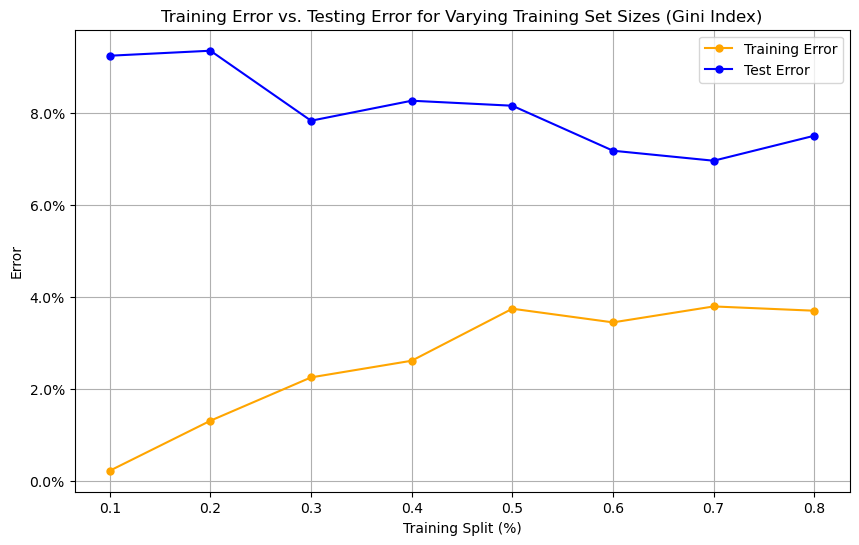

In [3]:
plot_accuracies_with_varying_splits(training_errors, testing_errors, 'Training Error vs. Testing Error for Varying Training Set Sizes (Gini Index)')

# Change max depth of weak learner

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


##Variables to change
test_size = 0.2
# #n_estimators: Number of weak learners to train iteratively.
# #max_depth: Maximum depth of the individual trees.

n_estimators = 50
criterion = 'gini'
# max_depth = 1

spambase_augmented = pd.read_csv('spambase_augmented.csv')

features = spambase_augmented.drop(spambase_augmented.columns[-1], axis=1)
target = spambase_augmented[spambase_augmented.columns[-1]]

max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

training_errors = []
testing_errors = []

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=42)


for max_depth in max_depths:

    print("Working on max_depth: ", max_depth)

    dt = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion)

    ada = AdaBoostClassifier(base_estimator=dt, n_estimators=n_estimators)

    ada.fit(X_train, y_train)

    y_train_pred = ada.predict(X_train)
    y_test_pred = ada.predict(X_test)

    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    training_errors.append(1 - training_accuracy)
    testing_errors.append(1 - testing_accuracy)

Working on max_depth:  1


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Working on max_depth:  2


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Working on max_depth:  3


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Working on max_depth:  4


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Working on max_depth:  5


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Working on max_depth:  6


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Working on max_depth:  7


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Working on max_depth:  8


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Working on max_depth:  9


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Working on max_depth:  10


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


def plot_accuracies_with_varying_max_depths(training_errors, testing_errors, title):
    plt.figure(figsize=(10, 6))
    plt.plot(max_depths, training_errors, label='Training Error',  linestyle='-', color='orange', marker='o', markersize=5)
    plt.plot(max_depths, testing_errors, label='Test Error', linestyle='-', color='blue', marker='o', markersize=5)

    plt.title(title)
    plt.xlabel('Max Depth of Weak Learner')
    plt.ylabel('Error')
    plt.legend()

    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))


    plt.grid(True)
    plt.show()

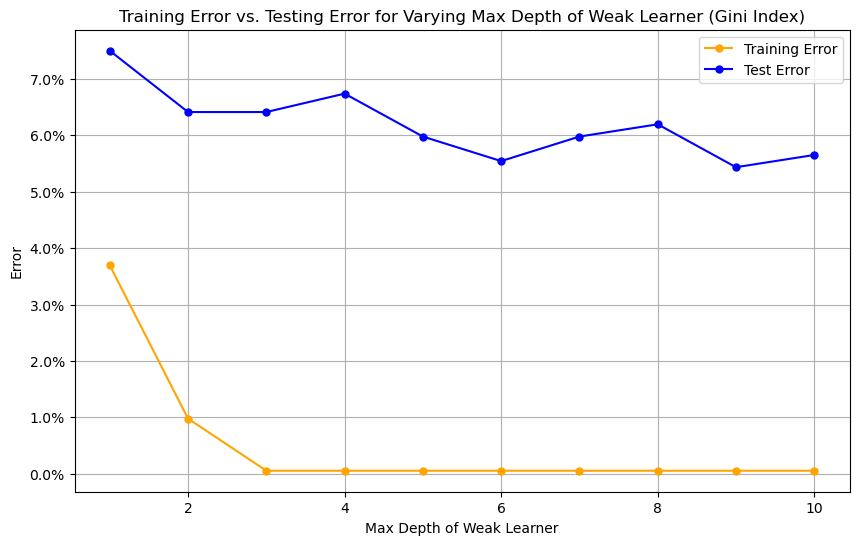

In [7]:
plot_accuracies_with_varying_max_depths(training_errors, testing_errors, 'Training Error vs. Testing Error for Varying Max Depth of Weak Learner (Gini Index)')

# Varying the number of weak hypothesis

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


##Variables to change
test_size = 0.2
# #n_estimators: Number of weak learners to train iteratively.
# #max_depth: Maximum depth of the individual trees.

# n_estimators = 50
max_depth = 1
criterion = 'gini'

spambase_augmented = pd.read_csv('spambase_augmented.csv')

features = spambase_augmented.drop(spambase_augmented.columns[-1], axis=1)
target = spambase_augmented[spambase_augmented.columns[-1]]

number_of_estimators = [10, 25, 50, 100, 150, 200, 250, 300, 350, 400]

training_errors = []
testing_errors = []

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=42)


for number in number_of_estimators:

    print("Working on number: ", number)

    dt = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion)

    ada = AdaBoostClassifier(base_estimator=dt, n_estimators=number)

    ada.fit(X_train, y_train)

    y_train_pred = ada.predict(X_train)
    y_test_pred = ada.predict(X_test)

    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    training_errors.append(1 - training_accuracy)
    testing_errors.append(1 - testing_accuracy)

Working on number:  10


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Working on number:  25


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Working on number:  50


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Working on number:  100


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Working on number:  150


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Working on number:  200


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Working on number:  250


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Working on number:  300


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Working on number:  350


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Working on number:  400


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


def plot_accuracies_with_varying_n_estimators(training_accuracies, testing_accuracies, title):
    plt.figure(figsize=(10, 6))
    plt.plot(number_of_estimators, training_accuracies, label='Training Error',  linestyle='-', color='orange', marker='o', markersize=5)
    plt.plot(number_of_estimators, testing_accuracies, label='Test Error', linestyle='-', color='blue', marker='o', markersize=5)

    plt.title(title)
    plt.xlabel('Number of Weak Learners')
    plt.ylabel('Error')
    plt.legend()

    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))


    plt.grid(True)
    plt.show()

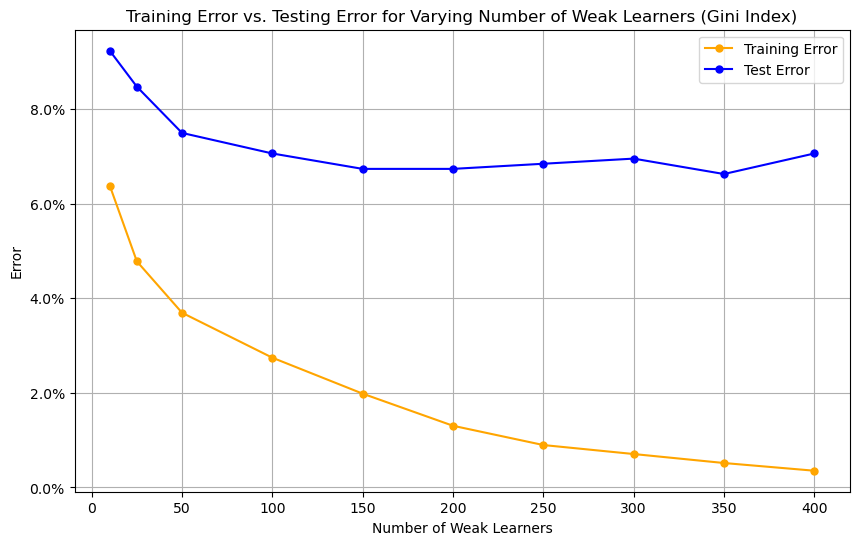

In [10]:
plot_accuracies_with_varying_n_estimators(training_errors, testing_errors, 'Training Error vs. Testing Error for Varying Number of Weak Learners (Gini Index)')

plot_accuracies_with_varying_max_depths(training_accuracies, testing_accuracies, 'ADA Boost with respect to training split')

# GINI vs entropy

In [ ]:

spambase_augmented = pd.read_csv('spambase_augmented.csv')

features = spambase_augmented.drop(spambase_augmented.columns[-1], axis=1)
target = spambase_augmented[spambase_augmented.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#n_estimators: Number of weak learners to train iteratively.
#max_depth: Maximum depth of the individual trees.

n_estimators = 50
max_depth = 6

dt_with_entropy = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy')
ada = AdaBoostClassifier(base_estimator=dt_with_entropy, n_estimators=n_estimators)

ada.fit(X_train, y_train)

y_pred_w_entropy = ada.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_w_entropy)

print(f'Accuracy with entropy: {accuracy:.2f}')

dt_with_gini = DecisionTreeClassifier(max_depth=max_depth, criterion='gini')
ada = AdaBoostClassifier(base_estimator=dt_with_gini, n_estimators=n_estimators)

ada.fit(X_train, y_train)

y_pred_w_gini = ada.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_w_gini)

print(f'Accuracy with gini: {accuracy:.2f}')


